In [13]:
import os
import json

In [14]:
dir = "../run_metadata"

In [15]:
def get_folder_names(path):
    try:
        contents = os.listdir(path)
        folder_names = [item for item in contents if os.path.isdir(os.path.join(path, item))]
        return folder_names
    except FileNotFoundError:
        return "Ошибка: Директория не найдена."
    except PermissionError:
        return "Ошибка: Недостаточно прав для доступа к директории."

In [16]:
models_dirs = get_folder_names(dir)
models_dirs


['handcrafted_resnet18',
 'handcrafted_ECG_detection',
 'ECG_detection',
 'resnet18']

In [17]:
experiments = dict()
for model_name in models_dirs:
    model_path = os.path.join(dir, model_name)
    exp_files = [f for f in os.listdir(model_path) if f.endswith('.json')]
    if exp_files:
        last_exp_file = max(exp_files)
        exp_file_path = os.path.join(model_path, last_exp_file)
        with open(exp_file_path, 'r') as data:
            experiments[model_name] = json.load(data)


In [18]:
print("Модели в экспериментах:", list(experiments.keys()))
for model_name, data in experiments.items():
    print(f"\n=== {model_name} ===")

    print(f"train_loss: {len(data['train_loss'])} эпох")
    print(f"val_loss: {len(data['val_loss'])} эпох")
    print(f"score_by_epoch: {len(data['score_by_epoch'])} эпох")

Модели в экспериментах: ['handcrafted_resnet18', 'handcrafted_ECG_detection', 'ECG_detection', 'resnet18']

=== handcrafted_resnet18 ===
train_loss: 10 эпох
val_loss: 10 эпох
score_by_epoch: 10 эпох

=== handcrafted_ECG_detection ===
train_loss: 20 эпох
val_loss: 20 эпох
score_by_epoch: 20 эпох

=== ECG_detection ===
train_loss: 10 эпох
val_loss: 10 эпох
score_by_epoch: 10 эпох

=== resnet18 ===
train_loss: 20 эпох
val_loss: 20 эпох
score_by_epoch: 20 эпох


In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)

import matplotlib.cm as cm
num_models = len(experiments)
color_map = plt.cm.tab10
colors = {model_name: color_map(i) for i, model_name in enumerate(experiments.keys())}

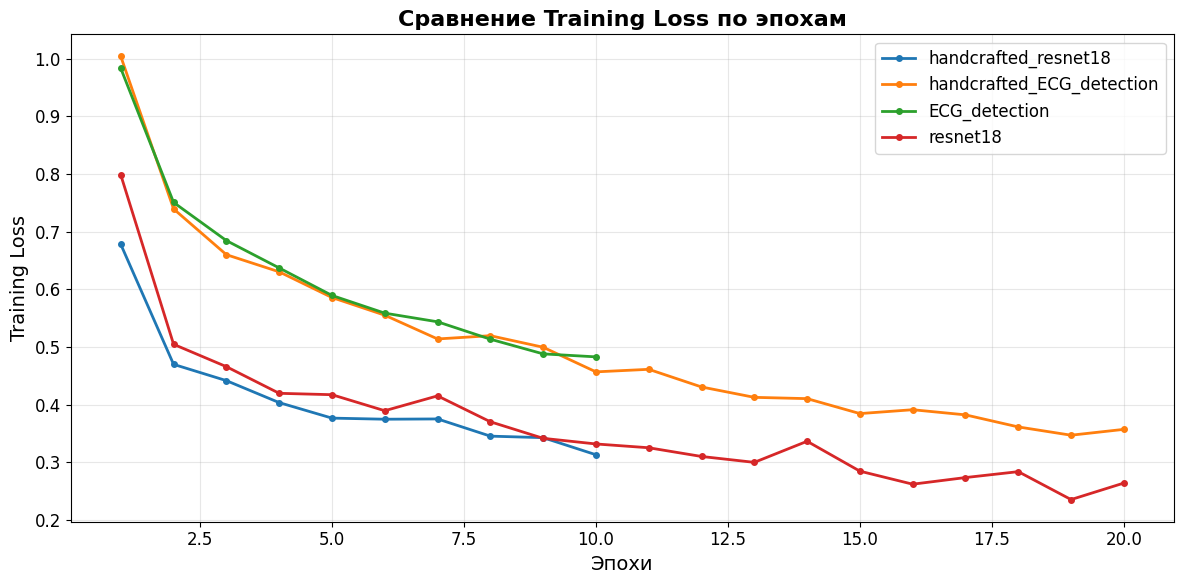

In [20]:
plt.figure(figsize=(12, 6))
for model_name, data in experiments.items():
    epochs = range(1, len(data['train_loss']) + 1)
    plt.plot(epochs, data['train_loss'], 
             label=f'{model_name}', 
             color=colors[model_name], 
             linewidth=2, 
             marker='o', 
             markersize=4)

plt.title('Сравнение Training Loss по эпохам', fontsize=16, fontweight='bold')
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

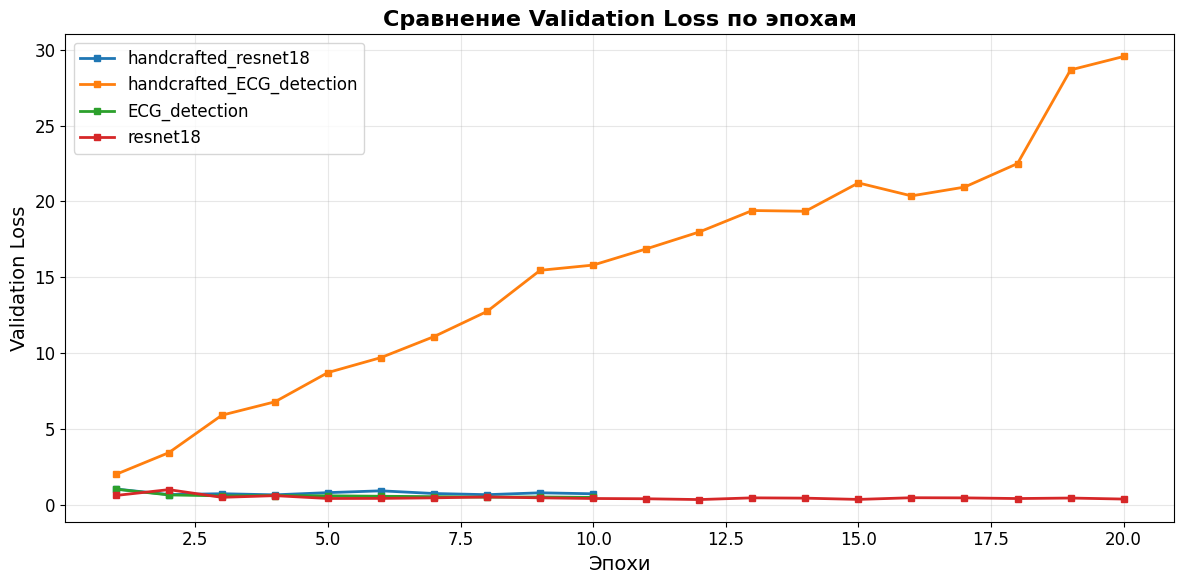

In [21]:
plt.figure(figsize=(12, 6))
for model_name, data in experiments.items():
    epochs = range(1, len(data['val_loss']) + 1)
    plt.plot(epochs, data['val_loss'], 
             label=f'{model_name}', 
             color=colors[model_name], 
             linewidth=2, 
             marker='s', 
             markersize=4)

plt.title('Сравнение Validation Loss по эпохам', fontsize=16, fontweight='bold')
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

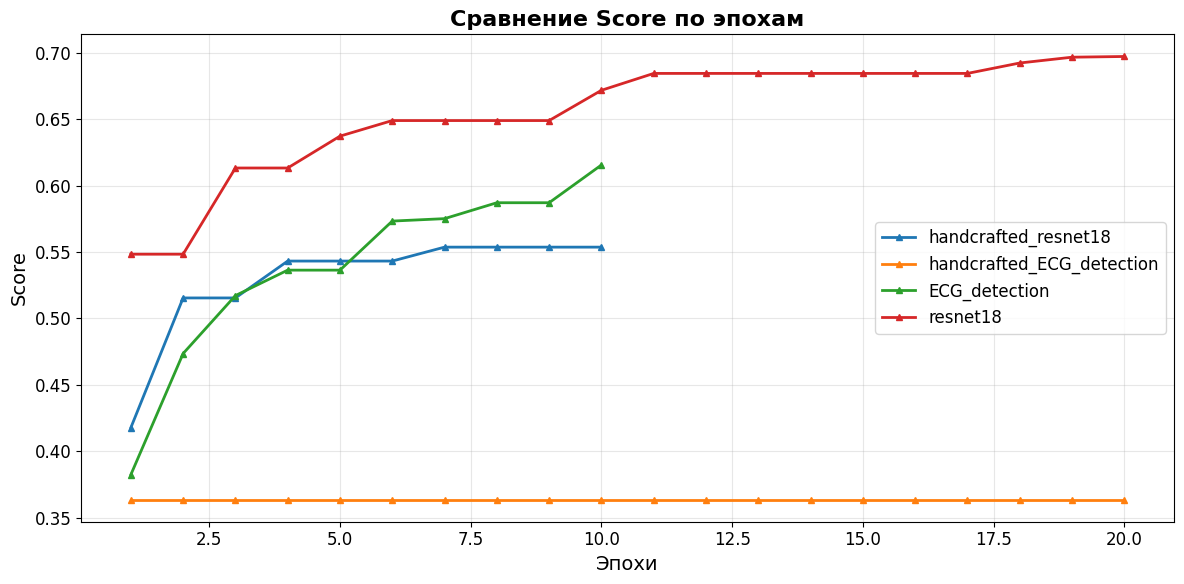

In [22]:
plt.figure(figsize=(12, 6))
for model_name, data in experiments.items():
    epochs = range(1, len(data['score_by_epoch']) + 1)
    plt.plot(epochs, data['score_by_epoch'], 
             label=f'{model_name}', 
             color=colors[model_name], 
             linewidth=2, 
             marker='^', 
             markersize=4)

plt.title('Сравнение Score по эпохам', fontsize=16, fontweight='bold')
plt.xlabel('Эпохи', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

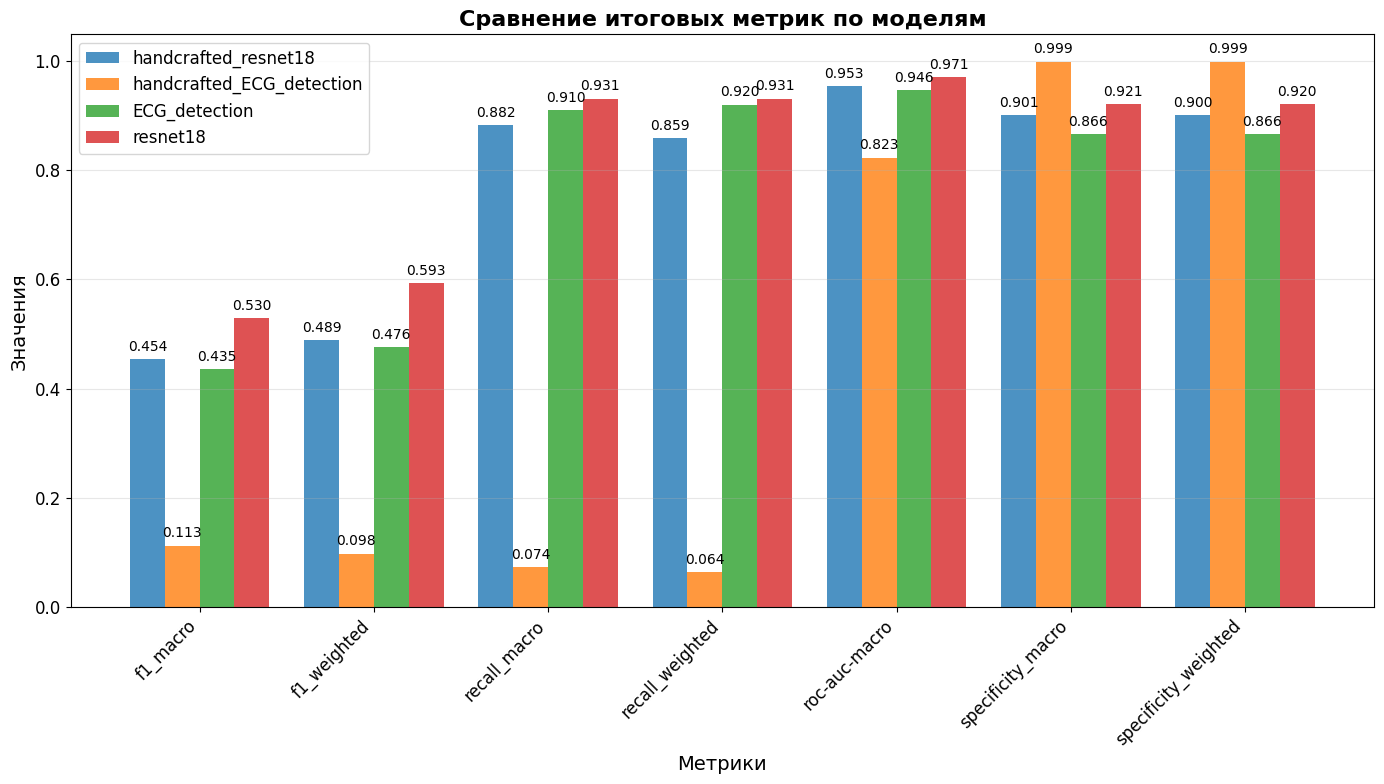

In [23]:
all_metrics = set()
for model_name, data in experiments.items():
    if 'scores' in data:
        all_metrics.update(data['scores'].keys())

metrics_list = sorted(list(all_metrics))

if metrics_list:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    n_metrics = len(metrics_list)
    n_models = len(experiments)
    
    bar_width = 0.8 / n_models
    x_pos = np.arange(n_metrics)
    
    for i, (model_name, data) in enumerate(experiments.items()):
        if 'scores' in data:
            values = [data['scores'].get(metric, 0) for metric in metrics_list]
            offset = (i - n_models/2 + 0.5) * bar_width
            ax.bar(x_pos + offset, values, 
                   bar_width, 
                   label=model_name, 
                   color=colors[model_name],
                   alpha=0.8)
    
    ax.set_title('Сравнение итоговых метрик по моделям', fontsize=16, fontweight='bold')
    ax.set_xlabel('Метрики', fontsize=14)
    ax.set_ylabel('Значения', fontsize=14)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(metrics_list, rotation=45, ha='right')
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    
    for i, (model_name, data) in enumerate(experiments.items()):
        if 'scores' in data:
            values = [data['scores'].get(metric, 0) for metric in metrics_list]
            offset = (i - n_models/2 + 0.5) * bar_width
            for j, value in enumerate(values):
                if value > 0:
                    ax.text(x_pos[j] + offset, value + max(values)*0.01, 
                           f'{value:.3f}', 
                           ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("Итоговые метрики не найдены в данных экспериментов")

## Выводы по результатам экспериментов

**Архитектуры, участвующие в сравнении:**

1. **ResNet18** - архитектура ResNet для одномерных сигналов
2. **ECG_detection** - простая версия CNN для одномерных сигналов
3. **handcrafted_** - приклеивание к фичам базовой модели фичей handcrafted-признаков

**Цель** - классификация четырех патологий: SARRH (аритмия), SBRAD (брадикардия), STACH (тахикардия), AFIB (фибрилляция предсердий).

### **Анализ обучения**

#### 1. Training Loss
- **Сходимость**: ResNet18 показывает наиболее быструю и стабильную сходимость
- **Ранжирование по эффективности**: ResNet18 > handcrafted_resnet18 > handcrafted_ECG_detection ≈ ECG_detection

#### 2. Validation Loss
- **Нестабильность**: После 10-й эпохи видны значительные колебания validation loss. Переобучение

#### 3. Score динамика
- **Лучшая модель**: ResNet18 достигает максимальных метрик (~0.74)
- **Плато**: У всех моделей перестают улучшаться метрики после 15-20 эпох
- **Ранжирование по метрикам**: ResNet18 > ECG_detection > handcrafted_resnet18 > handcrafted_ECG_detection

### **Описание метрик**

#### Recall (Sencitivity)
- **Определение**: Доля корректно выявленных положительных случаев среди всех истинно положительных
- **Значение**: Используем, потому что пропуск патологии имеет серьезные последствия

#### Specificity
- **Определение**: Доля корректно идентифицированных отрицательных случаев среди всех истинно отрицательных
- **Значение**: Минимизируем ложно-положительные результаты

#### F1-Score
- **Определение**: Гармоническое среднее между precision и recall
- **Применение**: Сбалансированная оценка качества модели

#### ROC-AUC
- **Определение**: Площадь под ROC-кривой, оценивающая способность модели к бинарной классификации
- **Интерпретация**: Значения от 0.5 (случайное угадывание) до 1.0 (идеальная классификация)

### **Cравнительный анализ результатов**

#### Лучшие показатели по метрикам:
1. **ROC-AUC**: ResNet18 (0.970) - наивысшая способность различения классов
2. **Recall**: ResNet18 (0.921) - максимальная чувствительность к патологиям

### **Основные выводы**

#### 1. Влияние handcrafted признаков
- **Положительный эффект**: Улучшение специфичности
- **Негативный эффект**: Снижение остальных метрик

#### 2. Выявленные проблемы
- **Переобучение**: Простейшая реализация handcrafted модуля вызывает переобучение у моделей с маленьким числом парметров.
- **Высокий дисбаланс классов**: Относительно низкие значения F1-score (0.56-0.63)

In [24]:
print("=== ИТОГОВОЕ РАНЖИРОВАНИЕ МОДЕЛЕЙ ===\n")

if all('scores' in data for data in experiments.values()):
    roc_auc_data = []
    for model_name, data in experiments.items():
        roc_auc = data['scores'].get('roc-auc-macro', 0)
        roc_auc_data.append((model_name, roc_auc))
    
    roc_auc_ranking = sorted(roc_auc_data, key=lambda x: x[1], reverse=True)
    print("1. РАНЖИРОВАНИЕ ПО ROC-AUC:")
    for i, (model_name, roc_auc) in enumerate(roc_auc_ranking, 1):
        print(f"   {i}. {model_name}: {roc_auc:.4f}")
    
    f1_data = []
    for model_name, data in experiments.items():
        f1 = data['scores'].get('f1_macro', 0)
        f1_data.append((model_name, f1))
    
    f1_ranking = sorted(f1_data, key=lambda x: x[1], reverse=True)
    print("\n2. РАНЖИРОВАНИЕ ПО F1-MACRO:")
    for i, (model_name, f1) in enumerate(f1_ranking, 1):
        print(f"   {i}. {model_name}: {f1:.4f}")
    
    score_data = []
    for model_name, data in experiments.items():
        max_score = max(data['score_by_epoch'])
        score_data.append((model_name, max_score))
    
    score_ranking = sorted(score_data, key=lambda x: x[1], reverse=True)
    print("\n3. РАНЖИРОВАНИЕ ПО МАКСИМАЛЬНОМУ SCORE:")
    for i, (model_name, max_score) in enumerate(score_ranking, 1):
        print(f"   {i}. {model_name}: {max_score:.4f}")

print("\n=== ЛУЧШИЕ ПОКАЗАТЕЛИ ПО КАЖДОЙ МЕТРИКЕ ===")

metrics_to_analyze = ['recall_macro', 'recall_weighted', 'specificity_macro', 
                     'specificity_weighted', 'f1_macro', 'f1_weighted', 'roc-auc-macro']

for metric in metrics_to_analyze:
    best_model = ""
    best_value = 0
    
    for model_name, data in experiments.items():
        if 'scores' in data and metric in data['scores']:
            value = data['scores'][metric]
            if value > best_value:
                best_value = value
                best_model = model_name
    
    print(f"{metric}: {best_model} ({best_value:.4f})")


=== ИТОГОВОЕ РАНЖИРОВАНИЕ МОДЕЛЕЙ ===

1. РАНЖИРОВАНИЕ ПО ROC-AUC:
   1. resnet18: 0.9705
   2. handcrafted_resnet18: 0.9533
   3. ECG_detection: 0.9464
   4. handcrafted_ECG_detection: 0.8225

2. РАНЖИРОВАНИЕ ПО F1-MACRO:
   1. resnet18: 0.5296
   2. handcrafted_resnet18: 0.4544
   3. ECG_detection: 0.4353
   4. handcrafted_ECG_detection: 0.1127

3. РАНЖИРОВАНИЕ ПО МАКСИМАЛЬНОМУ SCORE:
   1. resnet18: 0.6975
   2. ECG_detection: 0.6157
   3. handcrafted_resnet18: 0.5538
   4. handcrafted_ECG_detection: 0.3635

=== ЛУЧШИЕ ПОКАЗАТЕЛИ ПО КАЖДОЙ МЕТРИКЕ ===
recall_macro: resnet18 (0.9310)
recall_weighted: resnet18 (0.9307)
specificity_macro: handcrafted_ECG_detection (0.9986)
specificity_weighted: handcrafted_ECG_detection (0.9986)
f1_macro: resnet18 (0.5296)
f1_weighted: resnet18 (0.5935)
roc-auc-macro: resnet18 (0.9705)
